In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Customer-Churn-Records.csv')

# Display the first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [2]:
# Check for missing values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [3]:
# Check the data type
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [4]:
# Drop unused column
df = df.drop(columns=['RowNumber','Surname'])
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14172\880464145.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


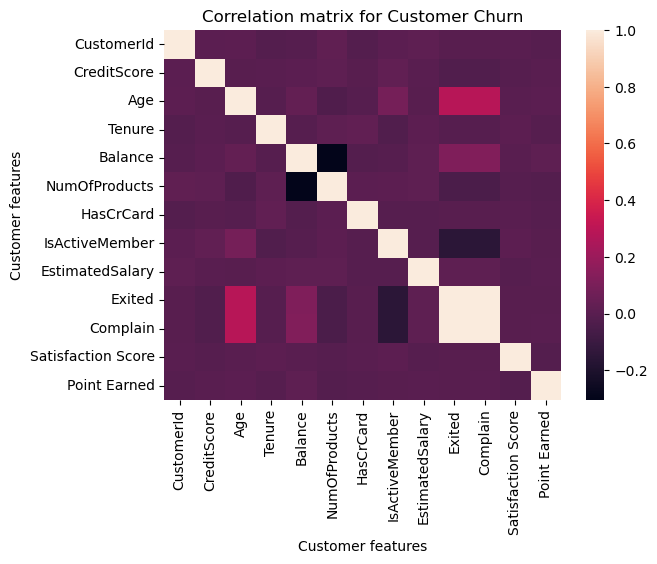

In [9]:
# Finding correlations between numeric data in the dataframe
corr_matrix = df.corr()

sns.heatmap(corr_matrix)
plt.title("Correlation matrix for Customer Churn")
plt.xlabel("Customer features")
plt.ylabel("Customer features")
plt.show()

## Churn Distribution

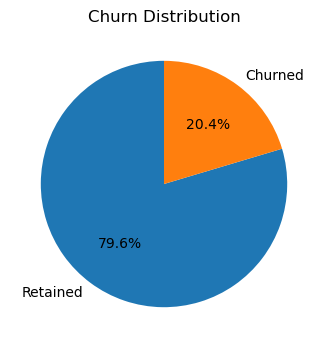

In [51]:
plt.figure(figsize=(4, 4))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

The churn rate is really high (20.4%).\
A good churn rate should be around 2%, and the average churn rate is normally between 2% and 8%.\
Let's see how this bank's churn rate is affected by various factor.

# My questions and observation:

## 1. Credit Score can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank?

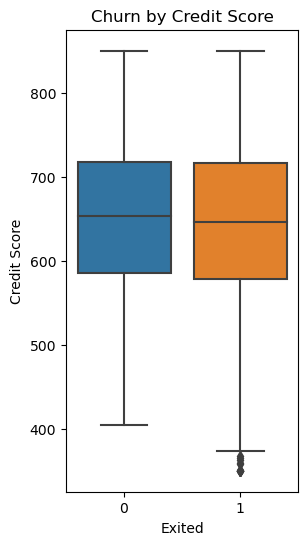

In [107]:
# Data visualization
plt.figure(figsize=(3,6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Churn by Credit Score')
plt.ylabel('Credit Score')
plt.show()

The distribution of Credit Score does not show a clear distinction between churned and credit score. Further analysis may be required to explore the relationship between credit score and churn in more detail.


## 2. A customer’s location can affect their decision to leave the bank?

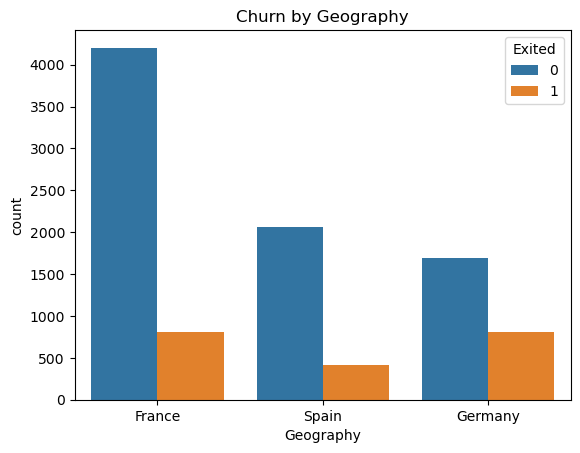

In [93]:
# Data visualization
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

In [71]:
df.groupby('Geography')['Exited'].mean()

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

The churn rate varies across different countries: Germany has the highest churn rate (32.4%), followed by Spain (16.7%) and France (16.2%). \
This suggests that geographic location may impact customer churn, with customers in certain countries more prone to churn.\
Specially, German customers have high churn rate. We may have to review the complaination, or have new marketing project for them.


## 3. Does gender affect the churn rate?

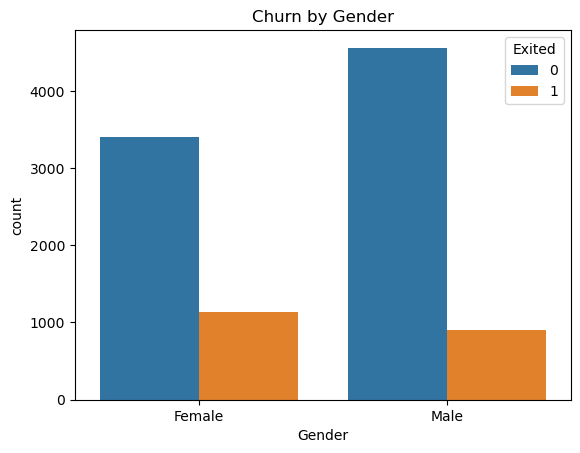

In [28]:
# Data visualization: 
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

In [29]:
df.groupby('Gender')['Exited'].mean()

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64

Churn rate for Female: 25.07% ; Male: 16.47%.\
This means gender may play a role in customer churn, with female customers being more likely to churn.\
We may need to review the complanation of female customers and explore further about the relationship between gender and age group to have appropriate marketing campaign.

## 4. Older customers are less likely to leave their bank than younger ones


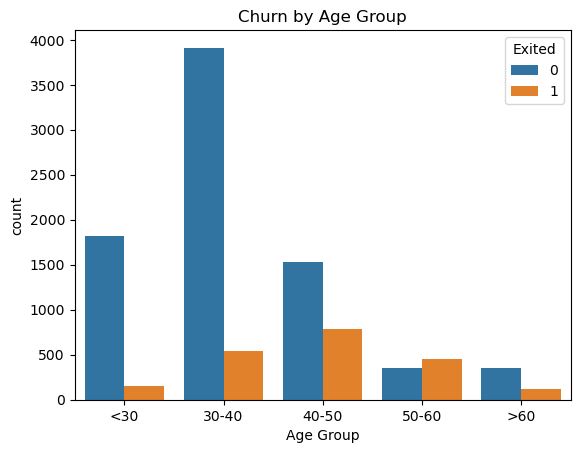

In [106]:
# Data Visualization
bins = [0, 30, 40, 50, 60, np.inf]
labels = ['<30', '30-40', '40-50', '50-60', '>60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.countplot(x='Age Group', hue='Exited', data=df)
plt.title('Churn by Age Group')
plt.show()

In [96]:
df.groupby('AgeGroup')['Exited'].mean()

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
>60      0.247845
Name: Exited, dtype: float64

These churn rates indicate that the highest churn rate is observed in the 50-60 age group (56.2%), followed by the 40-50 age group (33.9%). The lowest churn rate is observed in the <30 age group (7.5%). \
This implies that older customers are more likely to churn, while younger customers are more likely to stay with the bank.\
We may have further analysis about the relation between age group and estimated salary to see if they are potential customers\
or develop more financial solutions for the 60+ age group, such as retirement credit program, salary payment via digital bank...

## 5. Customers who purchased more products seem to be royal then who didn't?

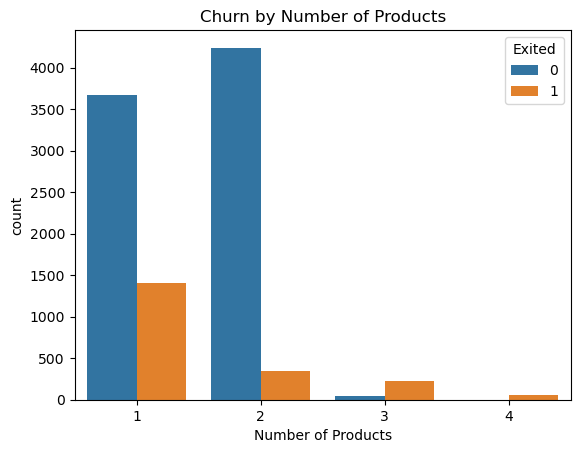

In [105]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')
plt.xlabel('Number of Products')
plt.show()

The hypothesis was wrong: Customers with fewer products may be less likely to churn, while those with more products may have a higher churn rate.\
The number of products held by customers can impact churn. Further analysis is required to understand the specific relationship.

## 6. Active customers are less likely to leave the bank?

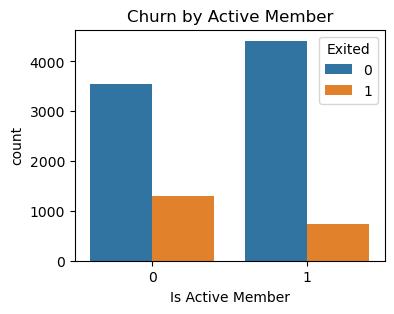

In [104]:
# Data Visualization
plt.figure(figsize=(4,3))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Active Member')
plt.xlabel('Is Active Member')
plt.show()

Active members appear to have a lower churn rate compared to inactive members.\
This suggests that engaged and active customers are more likely to stay with the bank.

## 7. People with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances

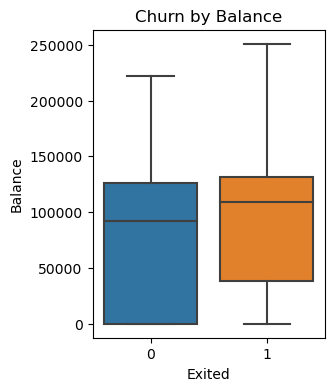

In [113]:
plt.figure(figsize=(3,4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Churn by Balance')
plt.show()

The distribution of account balances does not show a clear distinction between churned and retained customers.\
Further analysis and feature engineering may be required to explore the relationship between balance and churn in more detail.